## Part 1 : Meet the data  

In [116]:
# libraries
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
import statistics as stat
import random
import math
import scipy.stats as ss
from numpy import polyfit
import statsmodels.api as sm

# importing the data 
df = pd.read_excel('the_data_for_your_group_project_MA541.xlsx')
# displaying first few entries
df.head()

,Close_ETF,oil,gold,JPM
0,97.349998,0.039242,0.004668,0.032258
1,97.750000,0.001953,-0.001366,-0.002948
2,99.160004,-0.031514,-0.007937,0.025724
3,99.650002,0.034552,0.014621,0.011819
4,99.260002,0.013619,-0.011419,0.000855


In [9]:
# summary of the data
df.describe()

,Close_ETF,oil,gold,JPM
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,121.152960,0.001030,0.000663,0.000530
std,12.569790,0.021093,0.011289,0.011017
min,96.419998,-0.116533,-0.065805,-0.048217
25%,112.580002,-0.012461,-0.004816,-0.005538
50%,120.150002,0.001243,0.001030,0.000386
75%,128.687497,0.014278,0.007482,0.006966
max,152.619995,0.087726,0.042199,0.057480


In [10]:
# correlation among the variables
df.corr(method='pearson')

,Close_ETF,oil,gold,JPM
Close_ETF,1.000000,-0.009045,0.022996,0.036807
oil,-0.009045,1.000000,0.235650,-0.120849
gold,0.022996,0.235650,1.000000,0.100170
JPM,0.036807,-0.120849,0.100170,1.000000


## Part 2 : Describing the data

### 1) Histogram for each column

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

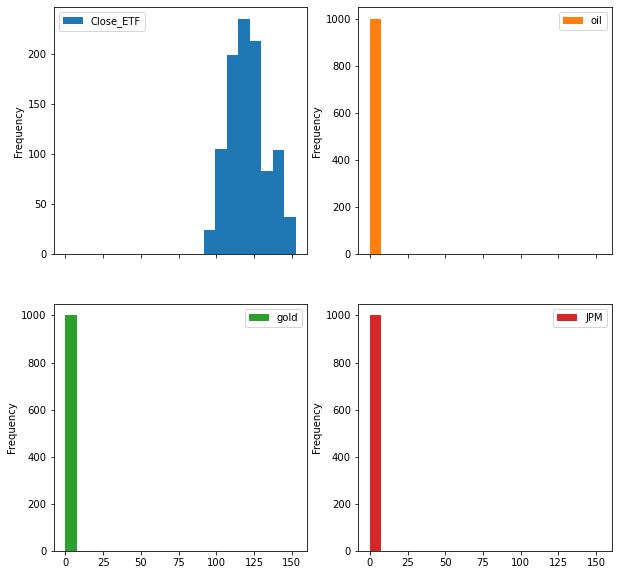

In [12]:
# histogram of individual columns displayed together
df.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)

### 2) Time series plot for each column

<AxesSubplot:>

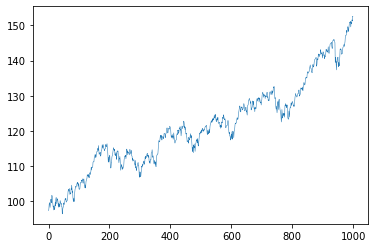

In [14]:
# line plot for 'ETF' column
df['Close_ETF'].plot(linewidth=0.5)

<AxesSubplot:>

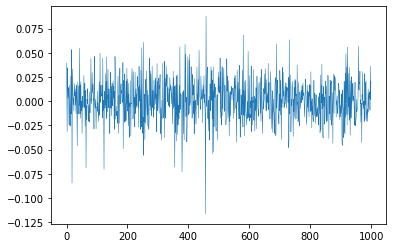

In [15]:
# line plot for 'oil' column
df['oil'].plot(linewidth=0.5)

<AxesSubplot:>

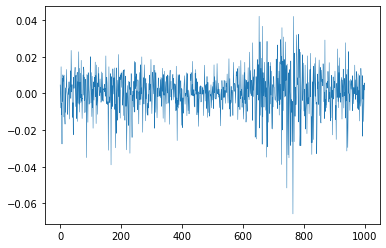

In [16]:
# line plot for 'gold' column
df['gold'].plot(linewidth=0.5)

<AxesSubplot:>

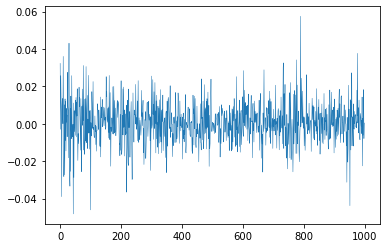

In [17]:
# line plot for 'JPM' column
df['JPM'].plot(linewidth=0.5)

### 3) Time series plot for all four columns

<AxesSubplot:>

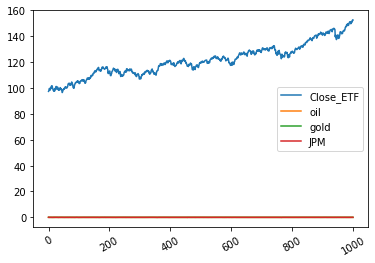

In [20]:
# line plot for all columns together
df.plot(rot=30)

### 4) Scatter plots describing relationships between the variables

<AxesSubplot:title={'center':'Oil v/s ETF'}, xlabel='Close_ETF', ylabel='oil'>

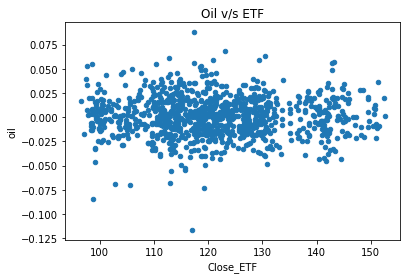

In [23]:
# scatter plot for 'Oil v/s ETF' 
df.plot.scatter(x='Close_ETF', y='oil', title='Oil v/s ETF')

<AxesSubplot:title={'center':'Gold v/s ETF'}, xlabel='Close_ETF', ylabel='gold'>

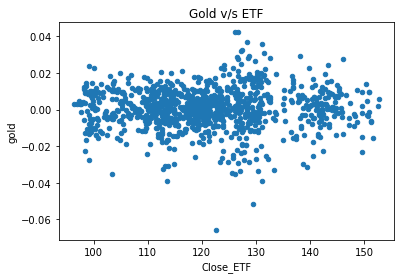

In [32]:
# scatter plot for 'Gold v/s ETF'
df.plot.scatter(x='Close_ETF', y='gold', title='Gold v/s ETF')

<AxesSubplot:title={'center':'JPM v/s ETF'}, xlabel='Close_ETF', ylabel='JPM'>

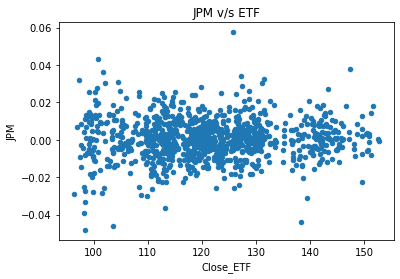

In [25]:
# scatter plot for 'JPM v/s ETF'
df.plot.scatter(x='Close_ETF', y='JPM', title='JPM v/s ETF')

## Part 3 : Distribution of the data

**We assume that the data follows a Gaussian distribution. To verify this, we use the Shapiro-Wilk test which tells us about the probability of the data that it was picked from a Gaussian distribution.**

**We calculate the Statistic and the p-value. If p<=alpha, we reject H0 else we fail to reject H0.**


In [35]:
# Creating a copy of the data
df1 = df

# generating observations
df1 = 5 * randn(100) + 50

# normality test
stat, p = shapiro(df1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Verifying the hypothesis
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.992, p=0.826
Sample looks Gaussian (fail to reject H0)


**On observing the p-value, we can infer that data was likely picked from a Gaussian distribution and hence it follows a Gaussian distribution.**

## Part 4 : Breaking the data into smaller groups and discussing the importance of Central Limit Theorem

### 1) Calculate the mean 𝜇𝑥 and the standard deviation 𝜎𝑥 of the population

In [2]:
population_mean = stat.mean(df['Close_ETF'])
print(population_mean)

sd_population = stat.stdev(df['Close_ETF'])
print(sd_population)

121.152960012
12.569790313110744


### 2) Breaking the population into 50 groups with 20 values in each

In [15]:
df2 = df['Close_ETF'].tolist()
n = 20 
sample=[] 

for i in range(0, len(df),n): 
    chunk = df2[i:i+20] 
    sample.append(chunk)   
    
for i in range (0, 50):
    print("Group %s is : \n %s" %(i+1 ,sample[i]))

Group 1 is : 
 [97.349998, 97.75, 99.160004, 99.650002, 99.260002, 98.25, 99.25, 100.300003, 100.610001, 99.559998, 101.660004, 101.660004, 101.57, 100.019997, 99.440002, 98.419998, 98.519997, 97.529999, 98.800003, 97.660004]
Group 2 is : 
 [97.629997, 98.529999, 99.769997, 98.739998, 100.699997, 101.150002, 100.580002, 99.300003, 100.239998, 100.730003, 100.510002, 99.919998, 98.5, 99.510002, 98.279999, 99.169998, 99.239998, 98.489998, 100.230003, 99.860001]
Group 3 is : 
 [99.400002, 99.160004, 99.389999, 98.510002, 98.510002, 96.419998, 96.980003, 98.0, 98.279999, 98.650002, 99.550003, 99.040001, 99.309998, 99.620003, 100.480003, 100.860001, 100.449997, 100.769997, 99.769997, 99.93]
Group 4 is : 
 [100.110001, 100.139999, 100.760002, 101.440002, 102.800003, 103.360001, 103.410004, 102.830002, 103.68, 103.0, 101.959999, 102.260002, 102.449997, 102.089996, 103.580002, 103.379997, 104.599998, 103.669998, 102.550003, 102.940002]
Group 5 is : 
 [101.110001, 100.279999, 99.949997, 100.93,

### 3) Calculate the sample mean (𝑥) of each group. Draw a histogram of all the sample means. Comment on the distribution of these sample means, i.e., use the histogram to assess the normality of the data consisting of these sample means

Sample Mean of Group 1 : 
 99.32100080000001
Sample Mean of Group 2 : 
 99.55399975
Sample Mean of Group 3 : 
 99.15400055
Sample Mean of Group 4 : 
 102.5505004
Sample Mean of Group 5 : 
 103.29199995
Sample Mean of Group 6 : 
 105.09350015
Sample Mean of Group 7 : 
 106.75099975
Sample Mean of Group 8 : 
 111.6580009
Sample Mean of Group 9 : 
 114.49950015
Sample Mean of Group 10 : 
 114.40050045
Sample Mean of Group 11 : 
 112.7764996
Sample Mean of Group 12 : 
 112.2859998
Sample Mean of Group 13 : 
 111.8089993
Sample Mean of Group 14 : 
 113.27149915
Sample Mean of Group 15 : 
 109.9474991
Sample Mean of Group 16 : 
 110.1430004
Sample Mean of Group 17 : 
 112.53550035
Sample Mean of Group 18 : 
 112.0754997
Sample Mean of Group 19 : 
 117.78150055
Sample Mean of Group 20 : 
 120.0504997
Sample Mean of Group 21 : 
 118.2080009
Sample Mean of Group 22 : 
 119.98099935
Sample Mean of Group 23 : 
 119.76750025
Sample Mean of Group 24 : 
 116.80299985
Sample Mean of Group 25 : 
 117.

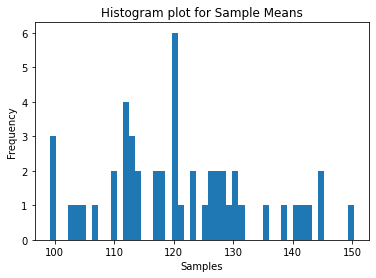

In [20]:
sample_mean_ = []
for i in range (0, 50): 
    chunk1 = stat.mean(sample[i]) 
    sample_mean_.append(chunk1) 

for i in range (0, 50): 
    print("Sample Mean of Group %s : \n %s" %(i+1 ,sample_mean_[i])) 

plt.hist(sample_mean_,50)
plt.title("Histogram plot for Sample Means") 
plt.xlabel("Samples") 
plt.ylabel("Frequency")
plt.show()

### 4) Calculate the mean (𝝁𝒙̅) and the standard deviation (𝛔𝒙̅) of the data including these sample means. Make a comparison between 𝝁𝒙 and 𝝁𝒙̅ , between 𝝈𝒙√𝒏 and 𝝈𝒙̅ . Here, 𝑛 is the number of sample means calculated from Item 3) above.

In [25]:
sample_mean_ =[]
for i in range (0, 50):
    chunk1 = stat.mean(sample[i]) 
    sample_mean_.append(chunk1)

total_sample_mean = stat.mean(sample_mean_)
total_sample_sd = stat.stdev(sample_mean_) 

print(total_sample_mean)
print(total_sample_sd)

121.15296001200001
12.615972812491503


### 6) Break the population into 10 groups sequentially and each group includes 100 values

In [26]:
df3 = df['Close_ETF'].tolist() 
n = 100 
sample=[] 
for i in range(0, len(df3),n):
    chunk = df3[i:i+100] 
    sample.append(chunk)

for i in range (0, 10): 
    print("Group %s is : \n %s" %(i+1 ,sample[i]))

Sample 1 is : 
 [97.349998, 97.75, 99.160004, 99.650002, 99.260002, 98.25, 99.25, 100.300003, 100.610001, 99.559998, 101.660004, 101.660004, 101.57, 100.019997, 99.440002, 98.419998, 98.519997, 97.529999, 98.800003, 97.660004, 97.629997, 98.529999, 99.769997, 98.739998, 100.699997, 101.150002, 100.580002, 99.300003, 100.239998, 100.730003, 100.510002, 99.919998, 98.5, 99.510002, 98.279999, 99.169998, 99.239998, 98.489998, 100.230003, 99.860001, 99.400002, 99.160004, 99.389999, 98.510002, 98.510002, 96.419998, 96.980003, 98.0, 98.279999, 98.650002, 99.550003, 99.040001, 99.309998, 99.620003, 100.480003, 100.860001, 100.449997, 100.769997, 99.769997, 99.93, 100.110001, 100.139999, 100.760002, 101.440002, 102.800003, 103.360001, 103.410004, 102.830002, 103.68, 103.0, 101.959999, 102.260002, 102.449997, 102.089996, 103.580002, 103.379997, 104.599998, 103.669998, 102.550003, 102.940002, 101.110001, 100.279999, 99.949997, 100.93, 99.949997, 102.080002, 102.449997, 103.389999, 103.860001, 104

### 7) Repeat Items 3) ~ 5)

Mean of Sample 1 : 100.77430029
Mean of Sample 2 : 110.48050028
Mean of Sample 3 : 112.01809939
Mean of Sample 4 : 114.51720014
Mean of Sample 5 : 118.40030004
Mean of Sample 6 : 121.6768003
Mean of Sample 7 : 125.78560011
Mean of Sample 8 : 128.01269998
Mean of Sample 9 : 135.39209964
Mean of Sample 10 : 144.47199995


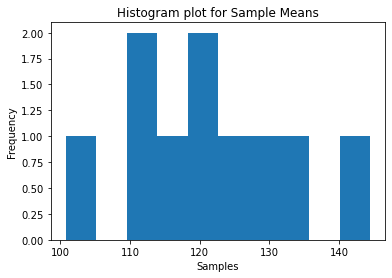

In [29]:
sample_mean_ =[] 
for i in range (0, 10):
    chunk1 = stat.mean(sample[i])
    sample_mean_.append(chunk1) 

for i in range (0, 10):
    print("Mean of Sample %s : %s" %(i+1 ,sample_mean_[i])) 
plt.hist(sample_mean_,10)
plt.title("Histogram plot for Sample Means") 
plt.xlabel("Samples")
plt.ylabel("Frequency") 
plt.show()

### 8) Generate 50 simple random samples or groups (with replacement) from the population. The size of each sample is 20, i.e., each group includes 20 values

In [35]:
df4 = df['Close_ETF'].tolist() 
sample=[] 

for i in range(0, 50):
    chunk = random.sample(df4,20)  
    sample.append(chunk) 

for i in range (0, 50):  
    print("Group %s is : %s" %(i+1 ,sample[i]))

Group 1 is : [119.779999, 122.879997, 109.620003, 144.660004, 118.190002, 126.660004, 115.949997, 117.82, 108.300003, 118.18, 129.729996, 141.619995, 121.669998, 150.529999, 117.459999, 114.25, 113.629997, 111.849998, 105.040001, 132.479996]
Group 2 is : [122.239998, 120.760002, 111.279999, 121.360001, 119.470001, 121.169998, 119.120003, 119.440002, 138.910004, 115.989998, 111.279999, 111.059998, 119.860001, 125.480003, 122.580002, 130.399994, 119.239998, 143.020004, 122.230003, 144.020004]
Group 3 is : [128.309998, 130.869995, 109.099998, 120.860001, 117.620003, 117.5, 110.449997, 106.849998, 131.669998, 116.550003, 122.720001, 127.360001, 109.550003, 108.300003, 104.260002, 112.089996, 113.839996, 99.650002, 121.400002, 113.139999]
Group 4 is : [123.540001, 129.410004, 108.900002, 122.650002, 104.260002, 117.110001, 120.389999, 126.410004, 144.889999, 107.599998, 119.949997, 114.68, 118.580002, 140.529999, 110.480003, 152.539993, 106.449997, 130.690002, 123.040001, 144.809998]
Group 

### 9) Repeat Items 3) ~ 5)

Mean of Random Sample 1 : 122.0149994
Mean of Random Sample 2 : 122.9455006
Mean of Random Sample 3 : 116.1044998
Mean of Random Sample 4 : 123.3455002
Mean of Random Sample 5 : 122.44099955
Mean of Random Sample 6 : 119.3275013
Mean of Random Sample 7 : 116.21500019999999
Mean of Random Sample 8 : 124.38300054999999
Mean of Random Sample 9 : 117.8334998
Mean of Random Sample 10 : 120.0855003
Mean of Random Sample 11 : 122.1384995
Mean of Random Sample 12 : 122.1950001
Mean of Random Sample 13 : 121.22799915
Mean of Random Sample 14 : 122.69849935
Mean of Random Sample 15 : 116.79600035
Mean of Random Sample 16 : 123.17950025
Mean of Random Sample 17 : 119.77250035
Mean of Random Sample 18 : 119.51499985
Mean of Random Sample 19 : 119.5305
Mean of Random Sample 20 : 117.978001
Mean of Random Sample 21 : 118.9190004
Mean of Random Sample 22 : 117.8860005
Mean of Random Sample 23 : 125.6704994
Mean of Random Sample 24 : 119.8439995
Mean of Random Sample 25 : 127.62500075
Mean of Random S

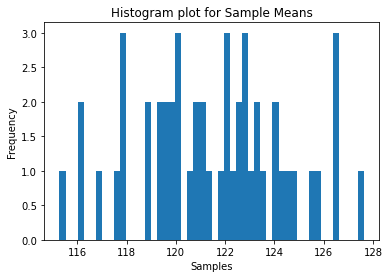

In [38]:
sample_mean_ =[]
for i in range (0, 50):
    chunk1 = stat.mean(sample[i]) 
    sample_mean_.append(chunk1) 
    
for i in range (0, 50): 
    print("Mean of Random Sample %s : %s" %(i+1 ,sample_mean_[i]))
plt.hist(sample_mean_,50) 
plt.title("Histogram plot for Sample Means") 
plt.xlabel("Samples")
plt.ylabel("Frequency") 
plt.show()

### 10) Generate 10 simple random samples or groups (with replacement) from the population. The size of each sample is 100, i.e., each group includes 100 values.

In [39]:
df5 = df['Close_ETF'].tolist() 
sample=[] 

for i in range(0, 10): 
    chunk = random.sample(df5,100) 
    sample.append(chunk) 

for i in range (0, 10):  
    print("Group %s is : %s" %(i+1 ,sample[i]))

Group 1 is : [142.339996, 129.649994, 140.529999, 111.849998, 119.209999, 128.169998, 139.5, 112.089996, 109.660004, 118.980003, 130.509995, 126.760002, 104.599998, 109.620003, 123.339996, 143.119995, 108.830002, 144.610001, 138.610001, 142.509995, 127.440002, 120.489998, 120.769997, 116.160004, 117.419998, 131.380005, 114.360001, 141.970001, 116.879997, 116.599998, 99.300003, 99.389999, 148.289993, 123.5, 105.150002, 128.419998, 111.029999, 118.790001, 109.650002, 112.970001, 126.129997, 127.120003, 126.849998, 136.279999, 143.179993, 102.830002, 142.800003, 118.610001, 148.119995, 111.0, 135.009995, 141.669998, 130.660004, 149.529999, 144.240005, 143.240005, 104.93, 142.130005, 109.550003, 148.059998, 145.020004, 133.360001, 108.900002, 118.349998, 122.470001, 129.800003, 126.269997, 141.949997, 118.440002, 115.989998, 134.919998, 130.759995, 123.209999, 111.830002, 140.919998, 136.589996, 126.82, 144.850006, 142.789993, 114.230003, 120.300003, 129.270004, 120.860001, 131.360001, 116

### 11) Repeat Items 3) ~ 5)

Mean of Random Sample 1 : 125.1616999
Mean of Random Sample 2 : 123.60819987
Mean of Random Sample 3 : 121.3920005
Mean of Random Sample 4 : 119.93060023
Mean of Random Sample 5 : 121.43240034
Mean of Random Sample 6 : 120.02029936
Mean of Random Sample 7 : 120.24009962
Mean of Random Sample 8 : 123.20690015
Mean of Random Sample 9 : 120.99259969
Mean of Random Sample 10 : 120.73779968


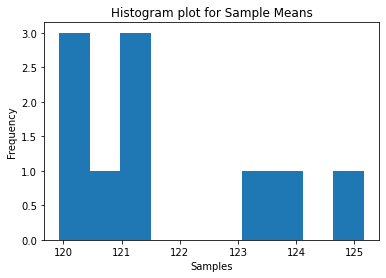

In [40]:
sample_mean_ =[] 
for i in range (0, 10): 
    chunk1 = stat.mean(sample[i]) 
    sample_mean_.append(chunk1) 

for i in range (0, 10): 
    print("Mean of Random Sample %s : %s" %(i+1 ,sample_mean_[i]))
    
plt.hist(sample_mean_,10) 
plt.title("Histogram plot for Sample Means") 
plt.xlabel("Samples") 
plt.ylabel("Frequency") 
plt.show()

### 12) In Part 3 of the project, you have figured out the distribution of the population (the entire ETF column). Does this information have any impact on the distribution of the sample mean(s)? Explain your answer

The distribution of the population does not affect the Central Limit Theorem with the exception that the sample size should be large. If the samples are small given that the population is normal or binomial, the Central Limit Theorem still holds.

## Part 5 : Construct a confidence interval with your data

### 1) Pick up one of the 10 simple random samples you generated in Step 10) of Part 4, construct an appropriate 95% confidence interval of the mean 𝜇

In [41]:
n=100
con_coef=.95
alpha=1. - con_coef
print(alpha)

0.050000000000000044


In [42]:
x_bar = stat.mean(sample[5])
print(x_bar)

120.02029936


In [44]:
sigma = stat.stdev(sample[5])
print(sigma)

12.626108655600147


In [47]:
z_critical = stats.norm.ppf(q=0.975)
print(z_critical)

1.959963984540054


In [48]:
zinterval = stats.norm.interval(alpha=con_coef) 
print(zinterval)

(-1.959963984540054, 1.959963984540054)


In [53]:
standard_error = sigma / math.sqrt(n)
print(standard_error)

1.2626108655600148


In [55]:
CI_lower = x_bar - z_critical * standard_error
CI_upper = x_bar + z_critical * standard_error 
print(CI_lower, CI_upper)

117.54562753701342 122.49497118298657


### 2) Pick up one of the 50 simple random samples you generated in Step 8) of Part 4, construct an appropriate 95% confidence interval of the mean 𝜇.

In [57]:
n=20 
con_coef=.95
alpha=1. - con_coef
print(alpha)

0.050000000000000044


In [58]:
x_bar = stat.mean(sample[5]) 
print(x_bar)

120.02029936


In [59]:
sigma = stat.stdev(sample[5]) 
print(sigma)

12.626108655600147


In [60]:
z_critical =stats.norm.ppf(q=0.975) 
print(z_critical)

1.959963984540054


In [61]:
zinterval = stats.norm.interval(alpha=con_coef) 
print(zinterval)

(-1.959963984540054, 1.959963984540054)


In [62]:
standard_error = sigma / math.sqrt(n) 
print(standard_error)

2.823283724522041


In [63]:
CI_lower = x_bar - z_critical * standard_error 
CI_upper = x_bar + z_critical * standard_error 
print(CI_lower, CI_upper)

114.4867649417987 125.5538337782013


### 3) In Part 1, you have calculated the mean 𝜇 of the population (the entire ETF column) using Excel function. Do the two intervals from 1) and 2) above include (the true value of) the mean 𝜇? Which one is more accurate? Why?

In [65]:
n=20 
con_coef=.95 
alpha=1. - con_coef
print(alpha)

0.050000000000000044


In [69]:
x_bar = stat.mean(df['Close_ETF']) 
print(x_bar)

121.152960012


In [70]:
sigma = stat.stdev(df['Close_ETF'])
print(sigma)

12.569790313110744


In [71]:
z_critical =stats.norm.ppf(q=0.975) 
print(z_critical)

1.959963984540054


In [72]:
zinterval = stats.norm.interval(alpha=con_coef) 
print(zinterval)

(-1.959963984540054, 1.959963984540054)


In [74]:
standard_error = sigma / math.sqrt(n) 
print(standard_error)

2.810690560303399


In [75]:
CI_lower = x_bar - z_critical * standard_error 
CI_upper = x_bar + z_critical * standard_error 
print(CI_lower, CI_upper)

115.64410774211862 126.66181228188137


## Part 6 : Form a hypothesis and test it with your data

### 1) Use the same sample you picked up in Step 1) of Part 5 to test 𝑯𝟎: 𝝁 = 𝟏𝟎𝟎 vs. 𝑯𝒂: 𝝁 ≠ 𝟏𝟎𝟎 at the significance level 0.05. What’s your conclusion?

In [77]:
mu = 100 
z_score = (x_bar - mu)/standard_error 
p_value = scipy.stats.norm.sf(abs(z_score)) 
print('P-value = %s' %(p_value)) 
P_value = 5.761777325650211e-63 
if p_value<alpha : 
    print('P-value is less than alpha and hence we are rejecting the Null hypothesis') 
else: 
    print('P-value is greater than alpha and hence we do not reject Null hypothesis')

P-value = 2.6180347465357498e-14
P-value is less than alpha and hence we are rejecting the Null hypothesis


### 2) Use the same sample you picked up in Step 2) of Part 5 to test 𝑯𝟎: 𝝁 = 𝟏𝟎𝟎 vs. 𝑯𝒂: 𝝁 ≠ 𝟏𝟎𝟎 at the significance level 0.05. What’s your conclusion?

In [78]:
mu = 100
z_score = (x_bar - mu)/standard_error
p_value = scipy.stats.norm.sf(abs(z_score)) 
print('P-value = %s' %(p_value))
if p_value<alpha :
    print('P-value is less than alpha and hence we are rejecting the Null hypothesis') 
else:
    print('P-value is greater than alpha and hence we do not reject Null hypothesis')

P-value = 2.6180347465357498e-14
P-value is less than alpha and hence we are rejecting the Null hypothesis


### 3) Use the same sample you picked up in Step 2) of Part 5 to test 𝑯𝟎: 𝝈 = 𝟏𝟓 vs. 𝑯𝒂: 𝝈 ≠ 𝟏𝟓 at the significance level 0.05. What’s your conclusion?

In [79]:
mu1 = 15 
z_score = (x_bar - mu)/standard_error 
p_value = scipy.stats.norm.sf(abs(z_score)) 
print('P-value = %s' %(p_value))
if p_value<alpha : 
    print('P-value is less than alpha and hence we are rejecting the Null hypothesis') 
else: 
    print('P-value is greater than alpha and hence we do not reject Null hypothesis')

P-value = 2.6180347465357498e-14
P-value is less than alpha and hence we are rejecting the Null hypothesis


### 4) Use the same sample you picked up in Step 2) of Part 5 to test 𝑯𝟎: 𝝈=𝟏𝟓 vs. 𝑯𝒂: 𝝈<𝟏𝟓 at the significance level 0.05. What’s your conclusion?

In [81]:
sdv5_2 = 9.8 
chi_low = ss.chi2.ppf(0.975, 999)  
chi_up = ss.chi2.ppf(1-0.975, 999) 
lower_bound = 999 * sdv5_2 / chi_low 
upper_bound = 999 * sdv5_2 / chi_up 
print(lower_bound) 
print(upper_bound)

8.994319078547864
10.719576588879928


We do not reject the null hypothesis since p-value is greater than alpha

## Part 7 : Compare your data with a different data set

### 1) Consider the entire Gold column as a random sample from the first population, and the entire Oil column as a random sample from the second population. Assuming these two samples be drawn independently, form a hypothesis and test it to see if the Gold and Oil have equal means in the significance level 0.05 

In [88]:
sample_gold = df['gold'].tolist() 
sample_oil = df['oil'].tolist()

x_bar1 = stat.mean(sample_gold) 
x_bar2 = stat.mean(sample_oil) 
print('Mean of Gold sample is: %s \nMean of Oil sample is: %s\n' %(x_bar1,x_bar2))

sigma1 = stat.stdev(sample_gold) 
sigma2 = stat.stdev(sample_oil) 
print('Standard deviation of Gold sample is: %s \nStandard deviation of Oil sample is: %s\n' %(sigma1,sigma2))
      
n = 1000
z_score = (x_bar1 - x_bar2 -0) / math.sqrt((sigma1**2)/n + (sigma2**2)/n) 
p_value = scipy.stats.norm.sf(abs(z_score))
      
print('P-value = %s' %(p_value)) 
stats.ttest_ind(sample_gold, sample_oil, equal_var = False)

Mean of Gold sample is: 0.000662836082 
Mean of Oil sample is: 0.0010300354937470015

Standard deviation of Gold sample is: 0.011289060259316142 
Standard deviation of Oil sample is: 0.021092898551005313

P-value = 0.3137081552533513


Ttest_indResult(statistic=-0.4853666138236087, pvalue=0.6274858963882113)

### 2) Subtract the entire Gold column from the entire Oil column and generate a sample of differences. Consider this sample as a random sample from the target population of differences between Gold and Oil. Form a hypothesis and test it to see if the Gold and Oil have equal means in the significance level 0.05

In [89]:
sample_diff=[] 
for i in range(0, 1000):  
    sample_diff.append(sample_oil[i] - sample_gold[i])  
sample_diff_mean = stat.mean(sample_diff)  
stats.ttest_1samp(sample_diff, sample_diff_mean)

Ttest_1sampResult(statistic=7.99173622334859e-17, pvalue=0.9999999999999999)

### 3) Consider the entire Gold column as a random sample from the first population, and the entire Oil column as a random sample from the second population. Assuming these two samples be drawn independently, form a hypothesis and test it to see if the Gold and Oil have equal standard deviations in the significance level 0.05

In [90]:
stats.ttest_ind_from_stats(mean1=0.000662836082, std1=0.011289060259316142, nobs1=1000, mean2=0.0010300354937470015, std2=0.021092898551005313, nobs2=1000)

Ttest_indResult(statistic=-0.4853666138236083, pvalue=0.627469525830638)

## Part 8 : Fitting the line to the data

### 1) Draw a scatter plot of ETF (Y) vs. Gold (X). Is there any linear relationship between them which can be observed from the scatter plot?

<AxesSubplot:title={'center':'ETF v/s Gold'}, xlabel='gold', ylabel='Close_ETF'>

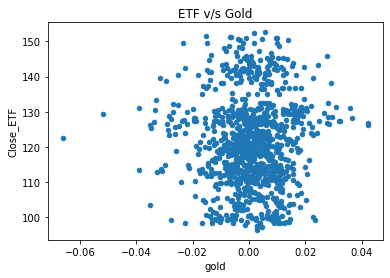

In [93]:
df.plot.scatter(x='gold', y='Close_ETF', title='ETF v/s Gold')

### 2) Calculate the coefficient of correlation between ETF and Gold and interpret it

In [94]:
correlation = stats.pearsonr(df['Close_ETF'], df['gold']) 
r,pvalue = correlation 
print("Correlation:",correlation )

Correlation: (0.022995570076054607, 0.46761178061829667)


### 3) Fit a regression line (or least squares line, best fitting line) to the scatter plot. What are the intercept and slope of this line? How to interpret them?

<AxesSubplot:xlabel='gold', ylabel='Close_ETF'>

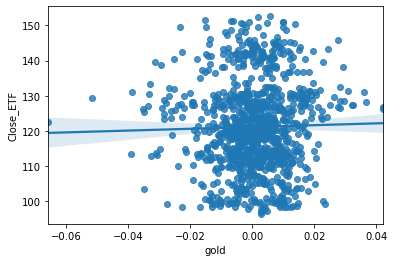

In [99]:
sns.regplot(x="gold", y="Close_ETF", data=df)

### 4) Conduct a two-tailed t-test with 𝐻0: 𝛽1=0. What is the P-value of the test? Is the linear relationship between ETF (Y) and Gold (X) significant at the significance level 0.01? Why or why not?

In [101]:
slope, intercept, r_value, p_value, standard_error = stats.linregress(df['gold'], df['Close_ETF']) 
print("Slope:",slope) 
print("Intercept:",intercept) 
print("P-value:",p_value) 

Slope: 25.60438932442726
Intercept: 121.13598849889819
P-value: 0.4676117806182941


### 5) Suppose that you use the coefficient of determination to assess the quality of this fitting. Is it a good model? Why or why not?

In [123]:
correlation = stats.pearsonr(df['Close_ETF'],df['gold'])
r,pvalue = correlation

cod = math.pow(r,2)
print("Coefficient of Determination",cod)

Coefficient of Determination 0.0005287962431227381


## Part 9 : Does your model predict ?

In [122]:
y = df['Close_ETF'] 
x = df[['oil', 'gold']]
z = sm.add_constant(x) 
results = sm.OLS(y,z).fit() 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Close_ETF   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3743
Date:                Tue, 04 May 2021   Prob (F-statistic):              0.688
Time:                        13:13:29   Log-Likelihood:                -3949.4
No. Observations:                1000   AIC:                             7905.
Df Residuals:                     997   BIC:                             7919.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.1427      0.399    303.856      0.000     120.360     121.925
oil           -9.1261     19.413     -0.470      0.638     -47.221      28.968
gold          29.6226     36.272      0.817      0.414     -41.555     100.800
==============================================================================
Omnibus:                       26.565   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.981
Skew:                           0.306   Prob(JB):                     1.02e-05
Kurtosis:                       2.579   Cond. No.                         92.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Part 9 Summary :

#### R-squared and Adjusted R-squared give us a gist of how many data points fall within the regression equation line with one small difference between them. R-squared assumes that every single variable explains the variation in the dependent variable. The Adjusted R-squared tells us the percentage of variation explained by only the independent variables that actually affect the dependent variable.

#### For a good fit, both of them should be atleast 80% or above. In our case, Adjusted R-squared is -0.001 which means 0.1% of the variation can be explained by the independent variables 'oil' and 'gold'. Hence we can conclude that it is not a good fit.

## Part 10 : Checking residuals and model selection

-5.846642975432428e-18
121.15296001200001


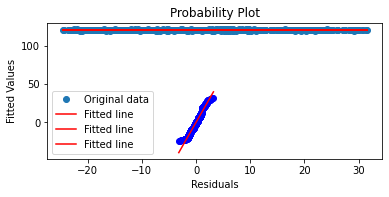

In [121]:
predicted_value = results.fittedvalues.copy()
true_value = df['Close_ETF'].values.copy()
residual = true_value - predicted_value

fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

slope, intercept, r_value, p_value, standard_error = sp.stats.linregress(residual,predicted_value)
plt.plot(residual, predicted_value, 'o', label ='Original data')
plt.plot(residual, intercept + slope*x, 'r', label ='Fitted line')

print(slope)
print(intercept)

plt.legend()
plt.xlabel("Residuals") 
plt.ylabel("Fitted Values") 
plt.show()